In [2]:
import numpy as np
import pandas as pd
import os
from sklearn import datasets

In [3]:
data = datasets.load_breast_cancer(as_frame=True)
data.feature_names

array(['mean radius', 'mean texture', 'mean perimeter', 'mean area',
       'mean smoothness', 'mean compactness', 'mean concavity',
       'mean concave points', 'mean symmetry', 'mean fractal dimension',
       'radius error', 'texture error', 'perimeter error', 'area error',
       'smoothness error', 'compactness error', 'concavity error',
       'concave points error', 'symmetry error',
       'fractal dimension error', 'worst radius', 'worst texture',
       'worst perimeter', 'worst area', 'worst smoothness',
       'worst compactness', 'worst concavity', 'worst concave points',
       'worst symmetry', 'worst fractal dimension'], dtype='<U23')

In [4]:
data = data.frame


In [5]:
data

,mean radius,mean texture,mean perimeter,mean area,mean smoothness,mean compactness,mean concavity,mean concave points,mean symmetry,mean fractal dimension,...,worst texture,worst perimeter,worst area,worst smoothness,worst compactness,worst concavity,worst concave points,worst symmetry,worst fractal dimension,target
0,17.99,10.38,122.80,1001.0,0.11840,0.27760,0.30010,0.14710,0.2419,0.07871,...,17.33,184.60,2019.0,0.16220,0.66560,0.7119,0.2654,0.4601,0.11890,0
1,20.57,17.77,132.90,1326.0,0.08474,0.07864,0.08690,0.07017,0.1812,0.05667,...,23.41,158.80,1956.0,0.12380,0.18660,0.2416,0.1860,0.2750,0.08902,0
2,19.69,21.25,130.00,1203.0,0.10960,0.15990,0.19740,0.12790,0.2069,0.05999,...,25.53,152.50,1709.0,0.14440,0.42450,0.4504,0.2430,0.3613,0.08758,0
3,11.42,20.38,77.58,386.1,0.14250,0.28390,0.24140,0.10520,0.2597,0.09744,...,26.50,98.87,567.7,0.20980,0.86630,0.6869,0.2575,0.6638,0.17300,0
4,20.29,14.34,135.10,1297.0,0.10030,0.13280,0.19800,0.10430,0.1809,0.05883,...,16.67,152.20,1575.0,0.13740,0.20500,0.4000,0.1625,0.2364,0.07678,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
564,21.56,22.39,142.00,1479.0,0.11100,0.11590,0.24390,0.13890,0.1726,0.05623,...,26.40,166.10,2027.0,0.14100,0.21130,0.4107,0.2216,0.2060,0.07115,0
565,20.13,28.25,131.20,1261.0,0.09780,0.10340,0.14400,0.09791,0.1752,0.05533,...,38.25,155.00,1731.0,0.11660,0.19220,0.3215,0.1628,0.2572,0.06637,0
566,16.60,28.08,108.30,858.1,0.08455,0.10230,0.09251,0.05302,0.1590,0.05648,...,34.12,126.70,1124.0,0.11390,0.30940,0.3403,0.1418,0.2218,0.07820,0
567,20.60,29.33,140.10,1265.0,0.11780,0.27700,0.35140,0.15200,0.2397,0.07016,...,39.42,184.60,1821.0,0.16500,0.86810,0.9387,0.2650,0.4087,0.12400,0


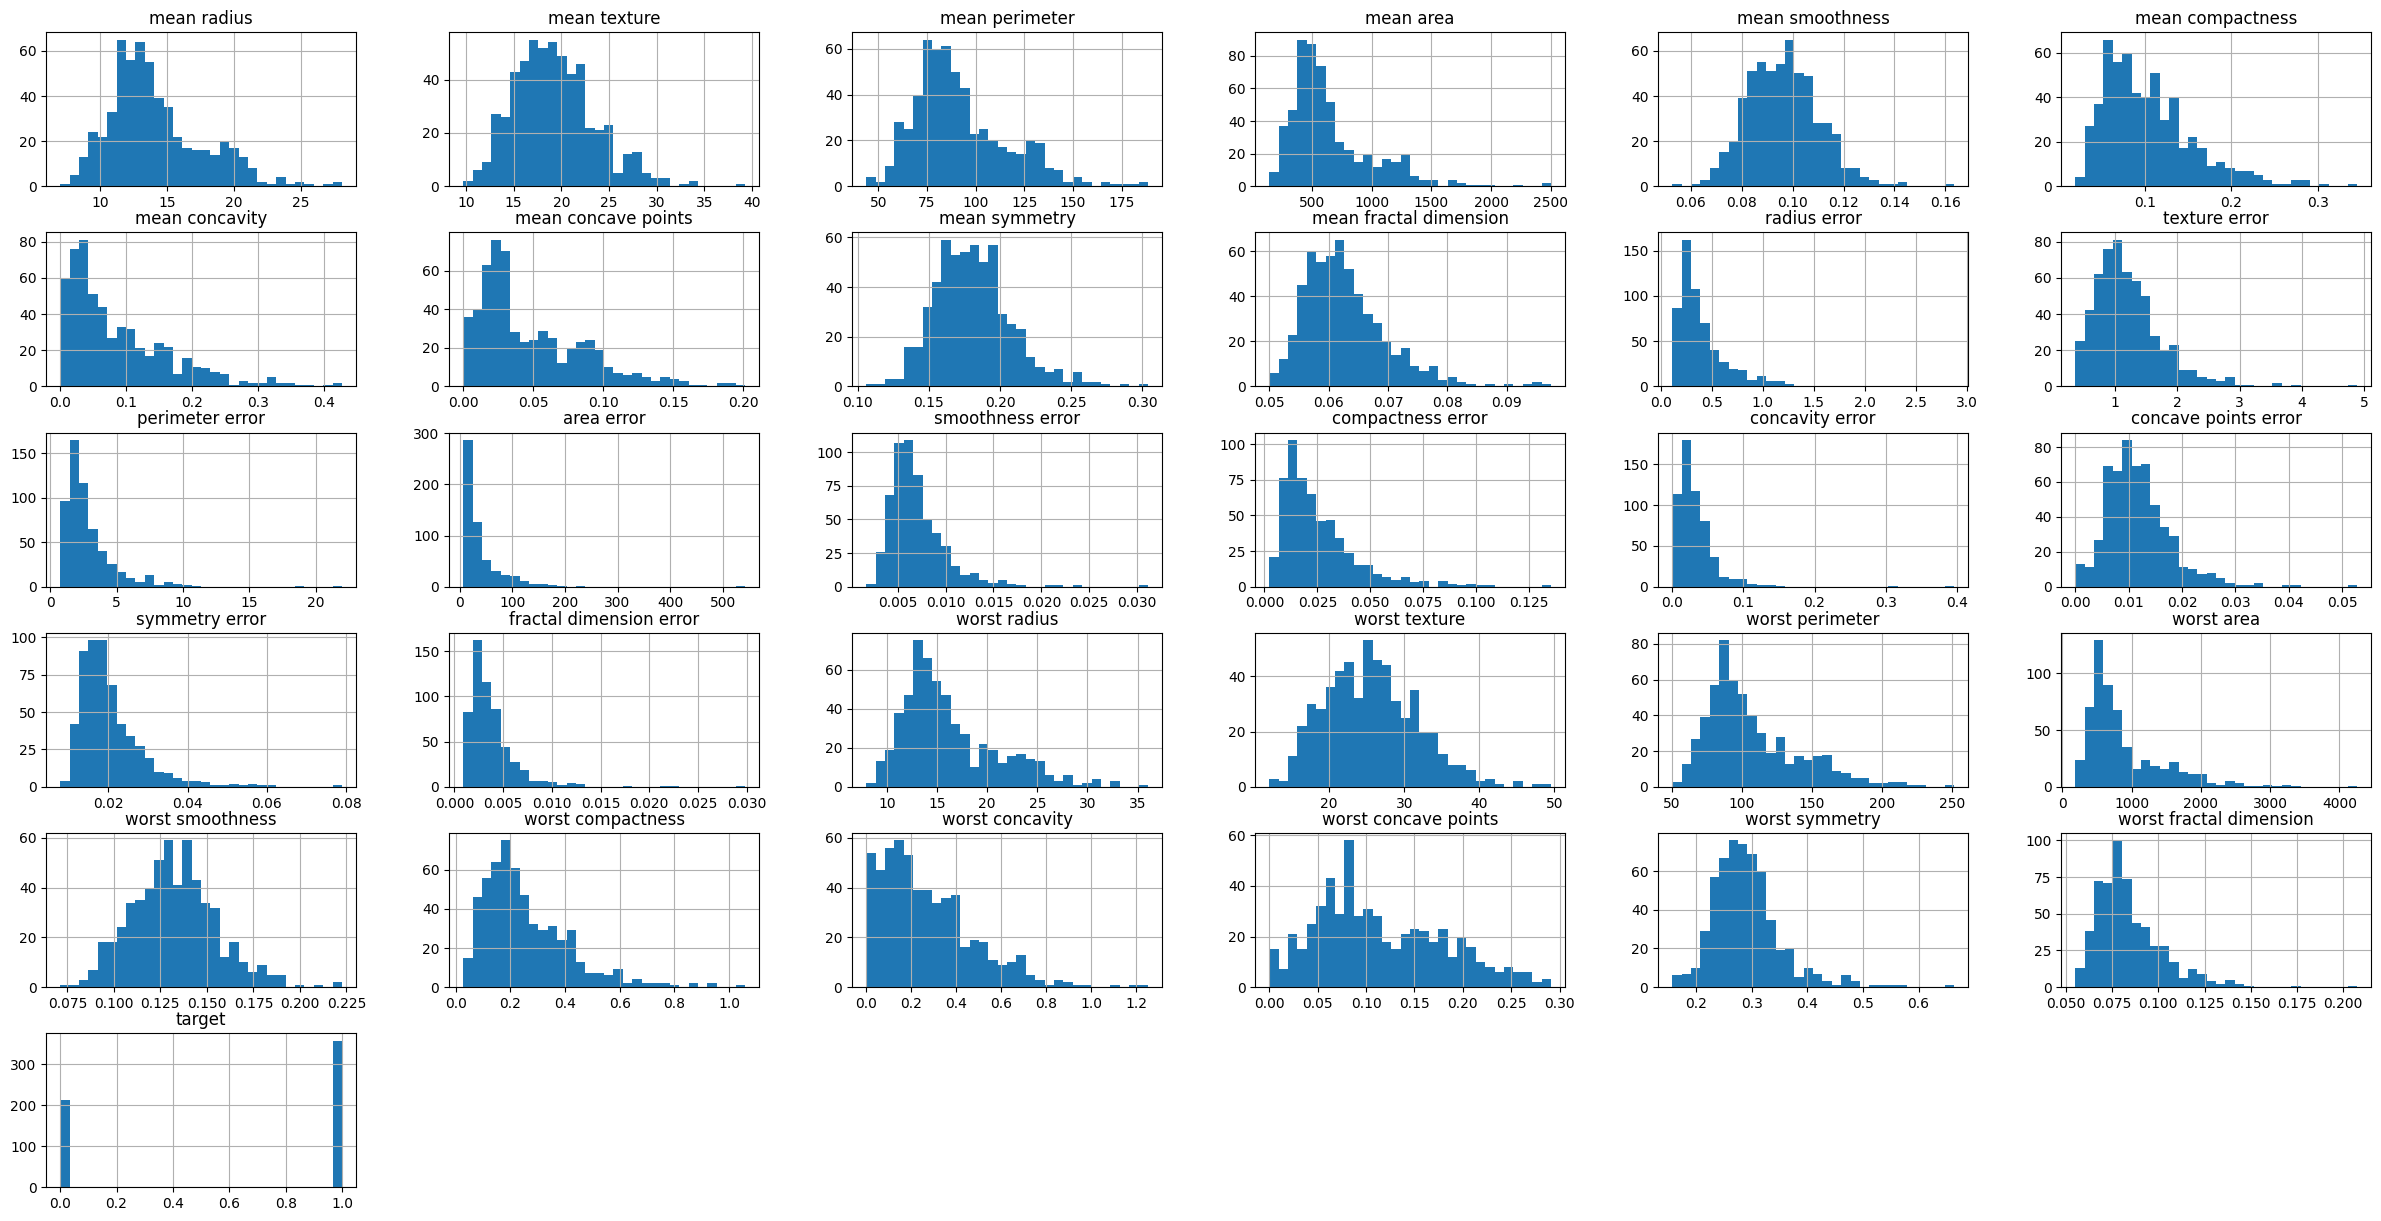

In [6]:
import matplotlib as mpl
import matplotlib.pyplot as plt
data.hist(bins=30, figsize=(30,15))
plt.show()

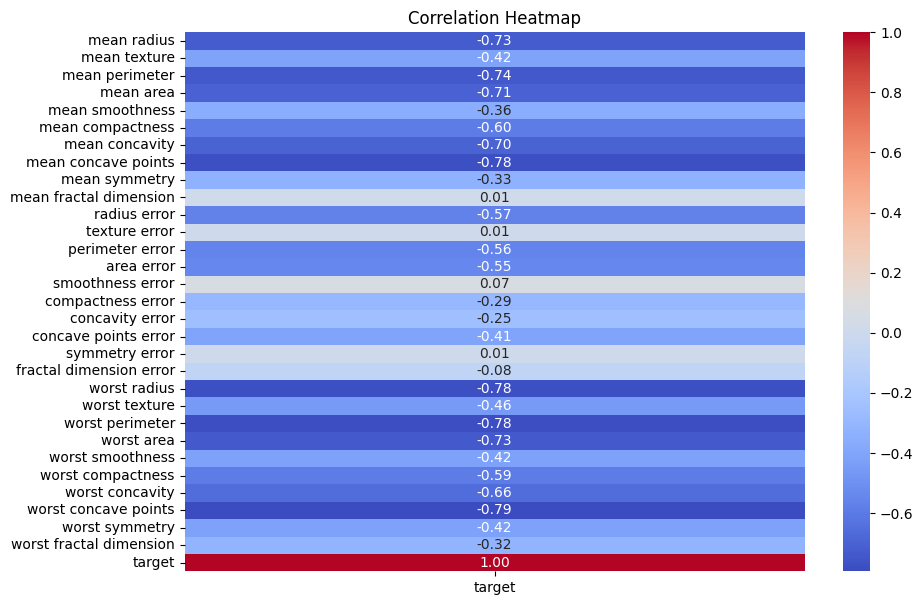

In [11]:
import numpy as np
import seaborn as sns
plt.figure(figsize=(10,7))
corr_matrix = data.corr()[['target']]
sns.heatmap(corr_matrix, annot=True, cmap="coolwarm", fmt=".2f" )
plt.title("Correlation Heatmap")
plt.show()


In [42]:
# ensure there is null values. otherwise, simple imputer should have been used 
incomplete = data[data.isnull().any(axis=1)]
incomplete

,mean radius,mean texture,mean perimeter,mean area,mean smoothness,mean compactness,mean concavity,mean concave points,mean symmetry,mean fractal dimension,...,worst texture,worst perimeter,worst area,worst smoothness,worst compactness,worst concavity,worst concave points,worst symmetry,worst fractal dimension,target


In [18]:
from sklearn.model_selection import StratifiedShuffleSplit
split = StratifiedShuffleSplit(n_splits=1, test_size=0.1)
for train_index, test_index in split.split(data, data['target']):
    train = data.loc[train_index]
    test = data.loc[test_index]
test.shape

(57, 31)

In [21]:
y_train = train['target']
x_train = train.drop(['target'], axis=1)
y_test = test['target']
x_test = test.drop(['target'], axis=1)
x_train.shape

(512, 30)

In [39]:
from sklearn.pipeline import Pipeline 
from sklearn.preprocessing import PolynomialFeatures, StandardScaler
std = StandardScaler()
pipeline = Pipeline([
    ('poly', PolynomialFeatures(degree=2)),
    ('std',std)
])

x_train_svm_poly = pipeline.fit_transform(x_train)
x_test_svm_poly = pipeline.fit_transform(x_test)

x_train_svm_std = std.fit_transform(x_train)
x_test_svm_std = std.fit_transform(x_test)

In [47]:
pd.DataFrame(x_test_svm_std, columns=x_train.columns).head(2)

,mean radius,mean texture,mean perimeter,mean area,mean smoothness,mean compactness,mean concavity,mean concave points,mean symmetry,mean fractal dimension,...,worst radius,worst texture,worst perimeter,worst area,worst smoothness,worst compactness,worst concavity,worst concave points,worst symmetry,worst fractal dimension
0,-0.47515,-0.262620,-0.525994,-0.511819,-0.775759,-1.031250,-0.949260,-1.050431,-0.223013,-0.534128,...,-0.582521,-0.532916,-0.654346,-0.582882,-1.021296,-1.024459,-1.146825,-1.452324,-0.534682,-0.964993
1,0.49218,0.848091,0.396636,0.370077,-0.904962,-0.587007,-0.608997,-0.331687,-0.832973,-0.818496,...,0.648761,1.400734,0.500225,0.536181,-0.468784,-0.522211,-0.560220,-0.156392,0.319179,0.191944


In [103]:
from sklearn.svm import SVC
from sklearn.model_selection import cross_val_score, cross_val_predict
svc_rbf = SVC(kernel='rbf', coef0=1, C=5)
svc_rbf.fit(x_train_svm_poly,y_train)
cross_val_score(svc_rbf, x_train_svm_poly, y_train, cv=5, scoring='f1')


array([0.97674419, 0.96969697, 1.        , 0.984375  , 0.97637795])

In [92]:
svc_linear = SVC(kernel='linear', C=4)
svc_linear.fit(x_train_svm_std,y_train)
cross_val_score(svc_linear, x_train_svm_std, y_train, cv=5, scoring='f1')


array([0.97674419, 0.96875   , 0.98412698, 0.97709924, 0.95384615])

polynomial features with RBF kernel is the best choice

In [98]:
from sklearn.metrics import f1_score
prediction_rbf = svc_rbf.predict(x_test_svm_poly)
f1_score(prediction_rbf, y_test)


1.0

of course it is not 100 percent accurate system but this is due to the complex system and small dataset 
also it is not overfitting as the last cv in cross validation was 97 accurate

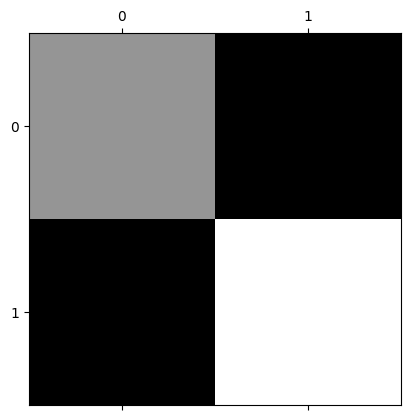

In [96]:
from sklearn.metrics import confusion_matrix
conf_matrix = confusion_matrix(prediction_rbf, y_test)
plt.matshow(conf_matrix, cmap=plt.cm.gray)
plt.show()

In [110]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.ensemble import VotingClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.svm import SVC

log_clf = LogisticRegression(solver="lbfgs", random_state=42)
rnd_clf = RandomForestClassifier(n_estimators=100, random_state=42)
svm_clf = SVC(gamma="scale", random_state=42)

voting_clf = VotingClassifier(
    estimators=[('lr', log_clf), ('rf', rnd_clf), ('svc', svm_clf)],
    voting='hard')

voting_clf.fit(x_train,y_train)

c:\Users\ibrah\AppData\Local\Programs\Python\Python312\Lib\site-packages\sklearn\linear_model\_logistic.py:469: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


VotingClassifier(estimators=[('lr', LogisticRegression(random_state=42)),
                             ('rf', RandomForestClassifier(random_state=42)),
                             ('svc', SVC(random_state=42))])

In [111]:
# it seems like different models conflict with each other
cross_val_score(voting_clf,x_train,y_train,cv=5,scoring='f1')

c:\Users\ibrah\AppData\Local\Programs\Python\Python312\Lib\site-packages\sklearn\linear_model\_logistic.py:469: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(
c:\Users\ibrah\AppData\Local\Programs\Python\Python312\Lib\site-packages\sklearn\linear_model\_logistic.py:469: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/st

array([0.97709924, 0.95522388, 0.984375  , 0.96969697, 0.94029851])

In [ ]:
from sklearn.ensemble import BaggingClassifier
from sklearn.tree import DecisionTreeClassifier

bag_clf = BaggingClassifier(
    DecisionTreeClassifier(), n_estimators=1000,
    max_samples=150, bootstrap=True, random_state=42)
bag_clf.fit(x_train, y_train)
cross_val_score(bag_clf,x_train,y_train,cv=5,scoring='f1')

array([0.98461538, 0.95384615, 0.984375  , 0.96969697, 0.96183206])

In [115]:
from sklearn.ensemble import RandomForestClassifier

rnd_clf = RandomForestClassifier(n_estimators=1000, max_leaf_nodes=20, random_state=42)
rnd_clf.fit(x_train, y_train)

cross_val_score(rnd_clf,x_train,y_train,cv=5,scoring='f1')

array([0.98461538, 0.96183206, 0.984375  , 0.97674419, 0.96183206])

In [116]:
rnd_clf.feature_importances_

array([0.04846648, 0.01353856, 0.05183108, 0.04188221, 0.00555181,
       0.01199922, 0.04830407, 0.08363128, 0.00361646, 0.00312892,
       0.01373858, 0.00423473, 0.01186449, 0.03364174, 0.0038506 ,
       0.00454678, 0.00595733, 0.00540977, 0.00390209, 0.0043869 ,
       0.10359197, 0.01963002, 0.1261146 , 0.13047225, 0.01346154,
       0.01360164, 0.03422836, 0.13802299, 0.01091185, 0.00648169])

In [117]:
from sklearn.ensemble import AdaBoostClassifier

ada_clf = AdaBoostClassifier(
    DecisionTreeClassifier(max_depth=1), n_estimators=200,
    algorithm="SAMME.R", learning_rate=0.5, random_state=42)
ada_clf.fit(x_train, y_train)

cross_val_score(ada_clf,x_train,y_train,cv=5,scoring='f1')

c:\Users\ibrah\AppData\Local\Programs\Python\Python312\Lib\site-packages\sklearn\ensemble\_weight_boosting.py:527: FutureWarning: The SAMME.R algorithm (the default) is deprecated and will be removed in 1.6. Use the SAMME algorithm to circumvent this warning.
  warnings.warn(
c:\Users\ibrah\AppData\Local\Programs\Python\Python312\Lib\site-packages\sklearn\ensemble\_weight_boosting.py:527: FutureWarning: The SAMME.R algorithm (the default) is deprecated and will be removed in 1.6. Use the SAMME algorithm to circumvent this warning.
  warnings.warn(
c:\Users\ibrah\AppData\Local\Programs\Python\Python312\Lib\site-packages\sklearn\ensemble\_weight_boosting.py:527: FutureWarning: The SAMME.R algorithm (the default) is deprecated and will be removed in 1.6. Use the SAMME algorithm to circumvent this warning.
  warnings.warn(
c:\Users\ibrah\AppData\Local\Programs\Python\Python312\Lib\site-packages\sklearn\ensemble\_weight_boosting.py:527: FutureWarning: The SAMME.R algorithm (the default) is 

array([0.97674419, 0.95454545, 0.98412698, 0.97709924, 0.98461538])

In [118]:
import xgboost
xg = xgboost.XGBClassifier()
xg.fit(x_train,y_train)
cross_val_score(xg,x_train,y_train,cv=5,scoring='f1')

array([0.98461538, 0.96124031, 0.97637795, 0.96183206, 0.96183206])

In [123]:
from sklearn.model_selection import RandomizedSearchCV
from sklearn.ensemble import RandomForestRegressor
from scipy.stats import randint

param_distribs = {
        'n_estimators': randint(low=900, high=1000),
        'max_features': randint(low=1, high=8),
    }

forest_reg = RandomForestRegressor(random_state=42)
rnd_search = RandomizedSearchCV(forest_reg, param_distributions=param_distribs,
                                n_iter=7, cv=3, scoring='neg_mean_squared_error', random_state=42)
rnd_search.fit(x_train, y_train)
cvres = rnd_search.cv_results_
for mean_score, params in zip(cvres["mean_test_score"], cvres["params"]):
    print(np.sqrt(-mean_score), params)

0.1836517636390192 {'max_features': 7, 'n_estimators': 951}
0.18299596535678966 {'max_features': 5, 'n_estimators': 914}
0.18228999296727483 {'max_features': 3, 'n_estimators': 971}
0.1829138996289557 {'max_features': 5, 'n_estimators': 920}
0.1837265967453738 {'max_features': 7, 'n_estimators': 982}
0.18356116765664615 {'max_features': 7, 'n_estimators': 974}
0.18236085100766977 {'max_features': 3, 'n_estimators': 987}


In [141]:
from sklearn.decomposition import PCA
pca = PCA(n_components=0.98)
x_train_reduced = pca.fit_transform(x_train)

In [143]:
# wow 98 percent of data is in only one dimension
pca.explained_variance_ratio_

array([0.98195465])

In [145]:
from sklearn.ensemble import RandomForestClassifier

rnd_clf = RandomForestClassifier(n_estimators=500, max_leaf_nodes=10, random_state=42)
rnd_clf.fit(x_train, y_train)

cross_val_score(rnd_clf,x_train_reduced,y_train,cv=5,scoring='f1')

array([0.94656489, 0.93023256, 0.95384615, 0.93129771, 0.89051095])